In [85]:
# data analytics in python
import numpy as np
import pandas as pd

# data
#from sklearn import datasets 

# plot
import matplotlib.pyplot as plt
%matplotlib inline

# regression
import sklearn
from sklearn import datasets, linear_model
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

# correlation coef.
from scipy.stats import pearsonr



In [75]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df["MEDV"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [76]:
# Lets make it simple - we select few features and the target data: 
# - MEDV     Median value of owner-occupied homes in $1000's
# and we select couple of numerical independent variables:
# - RM       average number of rooms per dwelling
# - AGE      proportion of owner-occupied units built prior to 1940
boston_df = boston_df[["MEDV", "RM", "AGE"]]


In [110]:
print boston_X_train.flatten()


[ 6.575  6.421  7.185  6.998  7.147  6.43   6.012  6.172  5.631  6.004
  6.377  6.009  5.889  5.949  6.096  5.834  5.935  5.99   5.456  5.727
  5.57   5.965  6.142  5.813  5.924  5.599  5.813  6.047  6.495  6.674
  5.713  6.072  5.95   5.701  6.096  5.933  5.841  5.85   5.966  6.595
  7.024  6.77   6.169  6.211  6.069  5.682  5.786  6.03   5.399  5.602
  5.963  6.115  6.511  5.998  5.888  7.249  6.383  6.816  6.145  5.927
  5.741  5.966  6.456  6.762  7.104  6.29   5.787  5.878  5.594  5.885
  6.417  5.961  6.065  6.245  6.273  6.286  6.279  6.14   6.232  5.874
  6.727  6.619  6.302  6.167  6.389  6.63   6.015  6.121  7.007  7.079
  6.417  6.405  6.442  6.211  6.249  6.625  6.163  8.069  7.82   7.416
  6.727  6.781  6.405  6.137  6.167  5.851  5.836  6.127  6.474  6.229
  6.195  6.715  5.913  6.092  6.254  5.928  6.176  6.021  5.872  5.731
  5.87   6.004  5.961  5.856  5.879  5.986  5.613  5.693  6.431  5.637
  6.458  6.326  6.372  5.822  5.757  6.335  5.942  6.454  5.857  6.151
  6.17

### - - - Simple lin. reg. , one feature

('alpha: ', array([ 9.21698222]))
('beta: ', -33.835295095716049)
Training Residual sum of squares: 35.17
Test Residual sum of squares: 80.97
Training Variance score: 0.56
Test Variance score: -1.78
Training pearson: (0.74812931340452127, 2.1620273751172364e-70)
Test pearson (0.31044819705630416, 0.00055878863139796967)


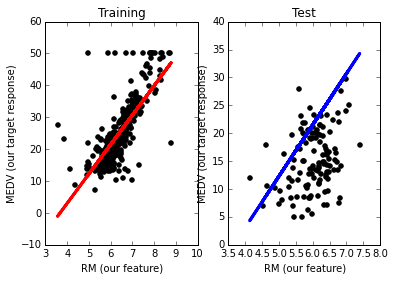

In [159]:
# create the model
regr = linear_model.LinearRegression()
# If we just split our sample to training and testing, with ratio e.g. 75/25
# And use only one feature

# Each newaxis object in the selection tuple serves to expand the dimensions of the resulting selection by one unit-length dimension
# boston_df["RAD"].shape ,  (506,)
# boston_df["RAD"][:, np.newaxis].shape, (506, 1)   <= this is the desired format for the independent variables
# boston_df["MEDV"].shape, (506, )                  <= this is the desired format for the target variable

boston_X = boston_df["RM"][:, np.newaxis]
boston_y = boston_df["MEDV"]

# Split the data into training/testing sets
boston_X_train = boston_X[:-120]
boston_X_test = boston_X[-120:]
# Split the targets into training/testing sets
boston_y_train = boston_y[:-120]
boston_y_test = boston_y[-120:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(boston_X_train, boston_y_train)

# The coefficients, are the alpha, beta line coefficients
print('alpha: ', regr.coef_)
print('beta: ', regr.intercept_)
a = regr.coef_
b = regr.intercept_
#and then we can plot the relevant line , e.g.
# plt.plot([-0.15, 0.15], [a*-0.15+b, a*0.15+b], 'k--', color='red', linewidth=3)

# The mean square error
print("Training Residual sum of squares: %.2f" % np.mean((regr.predict(boston_X_train) - boston_y_train) ** 2))
print("Test Residual sum of squares: %.2f" % np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2))


# Explained variance score: 1 is perfect prediction
# Returns the coefficient of determination R^2 of the prediction.
print('Training Variance score: %.2f' % regr.score(boston_X_train, boston_y_train))
print('Test Variance score: %.2f' % regr.score(boston_X_test, boston_y_test))

print 'Training pearson:',  pearsonr(boston_X_train.flatten().tolist(), boston_y_train.tolist())
print 'Test pearson',  pearsonr(boston_X_test.flatten(), boston_y_test.tolist())

#print('Test set cccuracy: %.2f' % accuracy_score(boston_X_test, boston_y_test))

 
# !!! Attention, few words on score - here the score is the R2 score !!! 
# There is no reason r^2 shouldn't be negative (despite the ^2 in its name).
# This is also stated in the doc. You can see r^2 as the comparison of your model fit 
# (in the context of linear regression, e.g a model of order 1 (affine)) to a model of order 0 
# (just fitting a constant), both by minimizing a squared loss. 
# The constant minimizing the squared error is the mean. 
# Since you are doing cross validation with left out data, 
# it can happen that the mean of your test set is wildly different from the mean of your training set. 
# This alone can induce a much higher incurred squared error in your prediction versus just predicting 
# the mean of the test data, which results in a negative r^2 score.
# In worst case, if your data do not explain your target at all, these scores can become very strongly negative. 

# TODO cross check next
# R^2 is bounded above by 1.0, but it is not bounded below. 
# Correlation is always bounded between -1 and 1. 
    

# Plot outputs
fig, ax = plt.subplots(1, 2)
ax[0].scatter(boston_X_train, boston_y_train,  color='black')
ax[0].plot(boston_X_train, regr.predict(boston_X_train), color='red', linewidth=3)
ax[0].set_title('Training')
ax[0].set_xlabel('RM (our feature)')
ax[0].set_ylabel('MEDV (our target response)')
ax[1].scatter(boston_X_test, boston_y_test,  color='black')
ax[1].plot(boston_X_test, regr.predict(boston_X_test), color='blue', linewidth=3)
ax[1].set_title('Test')
ax[1].set_xlabel('RM (our feature)')
ax[1].set_ylabel('MEDV (our target response)')

plt.show()

In [8]:
# comments, it is obvious even by looking at the plot to see that just splitting the sample e.g. 75/25 was not good enough.
# Especialy since our sample is relatively small ~500 rows 
# As we see there is not a good distribution and spread of data to partition it into separate training and test sets 
# in the conventional validation method.
# The training Variance score: 0.56
# The test Variance score: -1.78 - quite worse
# Also the relevant RSS is much better in training.

# It is worth to see what we can get by performing cross validation...

### - - - Intermediate step, shuffling while partition the data 

Training Residual sum of squares: 43.72
Test Residual sum of squares: 43.47
Training Variance score: 0.49
Test Variance score: 0.47
Training pearson: (0.6982268108526315, 1.1022488208096084e-56)
Test pearson (0.69099635917643398, 2.4610265817067474e-19)


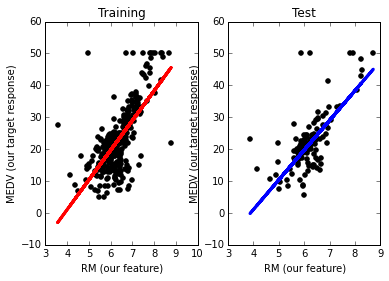

In [114]:
# In this example, is almost obvious that the data are not nicely distributed and when we split simply by [:120] etc
# we have big chances to be biased. 
# The best way to do it, is in the same time we split the data also to sample them so to be sure that they are better
# distributed. 
# We can get this quickly if we use the train_test_split function of scikit:
 
# use scikit to easily get the split
boston_X_train, boston_X_test, boston_y_train, boston_y_test = cross_validation.train_test_split(
    boston_df["RM"][:, np.newaxis], boston_df["MEDV"], test_size=0.25, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(boston_X_train, boston_y_train)
print("Training Residual sum of squares: %.2f" % np.mean((regr.predict(boston_X_train) - boston_y_train) ** 2))
print("Test Residual sum of squares: %.2f" % np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2))
print('Training Variance score: %.2f' % regr.score(boston_X_train, boston_y_train))
print('Test Variance score: %.2f' % regr.score(boston_X_test, boston_y_test))
print 'Training pearson:',  pearsonr(boston_X_train.flatten(), boston_y_train.tolist())
print 'Test pearson',  pearsonr(boston_X_test.flatten(), boston_y_test.tolist())


# Plot outputs
fig, ax = plt.subplots(1, 2)
ax[0].scatter(boston_X_train, boston_y_train,  color='black')
ax[0].plot(boston_X_train, regr.predict(boston_X_train), color='red', linewidth=3)
ax[0].set_title('Training')
ax[0].set_xlabel('RM (our feature)')
ax[0].set_ylabel('MEDV (our target response)')
ax[1].scatter(boston_X_test, boston_y_test,  color='black')
ax[1].plot(boston_X_test, regr.predict(boston_X_test), color='blue', linewidth=3)
ax[1].set_title('Test')
ax[1].set_xlabel('RM (our feature)')
ax[1].set_ylabel('MEDV (our target response)')
plt.show()

# !!! The results are greately improved !!!
# Nevertheless we will continue the work with cross validation and see what we can get out more of this technique

# !!! A note on shuffling found in scikit learn page
# If the data ordering is not arbitrary (e.g. samples with the same label are contiguous), 
# shuffling it first may be essential to get a meaningful cross- validation result. 
# However, the opposite may be true if the samples are not independently and identically distributed. 
# For example, if samples correspond to news articles, and are ordered by their time of publication, 
# then shuffling the data will likely lead to a model that is overfit and an inflated validation score:
# it will be tested on samples that are artificially similar (close in time) to training samples.

### - - - Simple lin. reg. , one feature With Cross Validation

In [ ]:
# THEORY (from wikipedia)
# Cross-validation, is a model validation technique for assessing how the results of a statistical analysis 
# will generalize to an independent data set.
# It is mainly used in settings where the goal is prediction, and we want to estimate how accurately 
# a predictive model will perform in practice.
# How it works:
# Cross validation involves many rounds.
# One round of cross-validation involves partitioning a sample of data into complementary subsets, 
# performing the analysis on one (training) subset, and validating the analysis on the other (testing) subset .
# To reduce variability, multiple rounds of cross-validation are performed using different partitions, 
# and the validation results are averaged over the rounds.

# Usually in conventional split, the RMSError on the test dataset does not properly represent model performance,
# this can happen due to :
# - not enough data available
# - not good distribution and spread of data to partition into separate training and test sets
# So a fair way to properly estimate model prediction performance is to use cross-validation.

# In summary, cross-validation combines (averages) measures of fit to correct for the training error 
# and derive a more accurate estimate of model prediction performance

[ 0.56789192  0.80745302 -0.54477417  0.34693869  0.74372546  0.51130486
  0.75803107 -0.41345788 -5.13329341 -0.03202355]
-0.238820398381
0.429121778678
Accuracy: -0.24 (+/- 3.39)


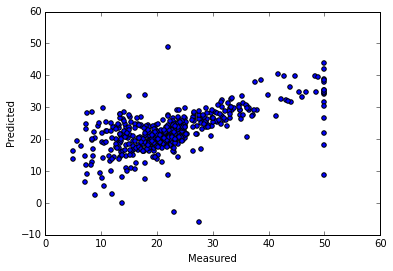

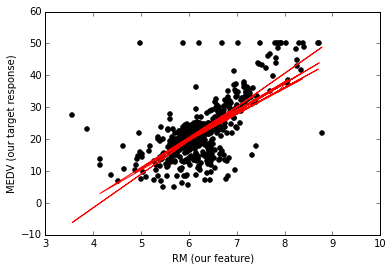

In [163]:
boston_X = boston_df["RM"][:, np.newaxis]
boston_y = boston_df["MEDV"]

nfolds = 10
estimator = linear_model.LinearRegression()
features = boston_X
target = boston_y

scores = cross_validation.cross_val_score(estimator, features, target, cv=nfolds, scoring='r2')
print scores 
print scores.mean()
print np.median(scores)
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



# Generate cross-validated estimates for each input data point
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_validation.cross_val_predict(estimator, features, target, cv=nfolds)
fig,ax = plt.subplots()
ax.scatter(target, predicted)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

#print('Training Variance score: %.2f' % regr.score(boston_y, predicted))
#print('Test Variance score: %.2f' % regr.score(boston_y.flatten(), predicted))
#print 'Training pearson:',  pearsonr(boston_y.flatten(), predicted.tolist())
#print 'Test pearson',  pearsonr(boston_y.flatten(), predicted.tolist())



# Plot outputs
fig, ax = plt.subplots(1, 1)
ax.scatter(features, target,  color='black')
ax.plot(features, predicted,  color='red', linewidth=1)
ax.set_xlabel('RM (our feature)')
ax.set_ylabel('MEDV (our target response)')
plt.show()

In [161]:
from sklearn.cross_validation import KFold

In [179]:
kf = KFold(len(features), n_folds=10)

In [184]:
xtr=[]
ytr=[]
xte=[]
yte=[]
for train, test in kf:
    xtr.append(train)
    xte.append(test)
Xtrain = features[xtr[0]]
ytrain = target[xtr[0]]
Xtest = features[xte[0]]
ytest = target[xte[0]]


regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xtrain, ytrain)
# Explained variance score: 1 is perfect prediction
# Returns the coefficient of determination R^2 of the prediction.
print 'Training Variance score',  regr.score(Xtrain, ytrain)
print'Test Variance score',  regr.score(Xtest, ytest)


Training Variance score 0.476780239965
Test Variance score 0.567891920274


In [183]:
# And yes it is the first test variance score we see in the cross_val_score above